# **ASSIGNMENT 3**
## **Model Interpretability**





**DATASET EXPLANATION:**

 Uploading the Bank Management Data set, The Dataset can be described as below.

Input variables:

Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

So there are total 21 columns and 41188 rows(data entries) in the choosen dataset.

In [1]:

# Importing all libraries necessary for the assignment
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import shap
import lime
from lime import lime_tabular
import sklearn
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:


import warnings
warnings.filterwarnings("ignore")



In [4]:
from sklearn.inspection import PartialDependenceDisplay


In [5]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222
     

In [6]:

# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

6


In [7]:
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)
     

Checking whether there is an H2O instance running at http://localhost:18975..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpojnbkv0m
  JVM stdout: /tmp/tmpojnbkv0m/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpojnbkv0m/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:18975
Connecting to H2O server at http://127.0.0.1:18975 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.2
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_unknownUser_vqwr5s
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:18975
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  ----------------------------------

In [8]:

import seaborn as sns
url = 'https://raw.githubusercontent.com/Pramita0410/AutoML_bank/main/bank-additional-full.csv'

data = pd.read_csv(url, sep=';')

In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
df = pd.get_dummies(data) #creating dummies

In [11]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [12]:
#creating a drop list to drop the unnesccesary coulms from the dataset
drop_list = ['job_admin.','job_blue-collar','job_entrepreneur','job_housemaid',
             'job_management','job_retired','job_self-employed','job_services',
             'job_student','job_technician','job_unemployed','job_unknown',
             'education_basic.4y','education_basic.6y','education_basic.9y',
            'education_high.school','education_illiterate','education_professional.course'
,'education_university.degree','education_unknown','month_apr','month_aug','month_dec','month_jul',
 'month_jun','month_mar','month_may','month_nov','month_oct','month_sep','contact_cellular'
,'contact_telephone','day_of_week_fri','day_of_week_mon','day_of_week_thu','day_of_week_tue',
'day_of_week_wed','marital_divorced','marital_married','marital_single','marital_unknown','default_unknown',
'housing_unknown','loan_unknown','poutcome_nonexistent','default_no','default_yes','housing_no','housing_yes','loan_no','loan_yes','poutcome_failure',
'age','duration','campaign','pdays','previous','cons.price.idx','cons.conf.idx','y_no']
drop_data = df[drop_list]
df.drop(drop_list,axis=1,inplace=True)

In [13]:
df.columns

Index(['emp.var.rate', 'euribor3m', 'nr.employed', 'poutcome_success',
       'y_yes'],
      dtype='object')

In [14]:

# Split the data into features (x) and target variable (y)
y = df['y_yes']
x = df.drop(['y_yes'], axis=1)


# **Fitting a Linear Model**


In [15]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)


In [16]:

# Initialize and train the linear regression model
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

Performing MinMax Scaler to evaaluate the coefficients

In [17]:
data2 = pd.get_dummies(data)

# Normalizing the data in the columns beacuse some values are too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats. (between 0-1)
#Here we are not normalizing the categorical variables since there values are 0 or 1 already.

x = data2[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data2[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] = pd.DataFrame(x_scaled)


In [18]:
#since we know no nulls are present we are trying to remove any infs if present.
data2.replace([np.inf, -np.inf], np.nan)

np.any(np.isnan(data2))
np.all(np.isfinite(data2))


True

In [19]:
data2.dropna(how='any', inplace=True)


In [20]:
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [21]:

from sklearn.preprocessing import OneHotEncoder

# One-hot encode the categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
encoder = OneHotEncoder()
encoded_cols = encoder.fit_transform(data[categorical_cols]).toarray()
encoded_cols_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded columns with the numerical columns
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
data = pd.concat([data[numerical_cols], encoded_cols_df], axis=1)

###**Checking the significance using OLS**









In [22]:
#Using OLS for p value
import statsmodels.api as sm
model = sm.OLS(data['y_yes'], data[['emp.var.rate','euribor3m','nr.employed','poutcome_nonexistent','poutcome_success']]).fit()
model.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  y_yes   R-squared (uncentered):                   0.249
Model:                            OLS   Adj. R-squared (uncentered):              0.249
Method:                 Least Squares   F-statistic:                              2735.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        20:12:43   Log-Likelihood:                         -7573.6
No. Observations:               41188   AIC:                                  1.516e+04
Df Residuals:                   41183   BIC:                                  1.520e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
emp.var.rate            -0.0170      0.004     -4.317      0.000      -0.025      -0.009
euribor3m               -0.0337      0.004     -9.141      0.000      -0.041      -0.027
nr.employed           3.289e-05   2.63e-06     12.500      0.000    2.77e-05     3.8e-05
poutcome_nonexistent     0.0579      0.005     11.129      0.000       0.048       0.068
poutcome_success         0.4839      0.009     53.457      0.000       0.466       0.502
==============================================================================
Omnibus:                    17100.950   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63479.545
Skew:                           2.137   Prob(JB):                         0.00
Kurtosis:                       7.327   Cond. No.                     3.38e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpreting Regression Co-efficients

**R-squared (R²)** and **p-values** are two important statistics used to evaluate the strength and significance of the relationship between a dependent variable and one or more independent variables in a regression analysis.

**The uncentered R-squared value is 0.249**. This means that the independent variables included in the model explain 24.9% of the variation in the dependent variable.

P-value is 0. This means that the relationship is considered statistically significant.


## Fit Tree Based Model


In [23]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)   

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

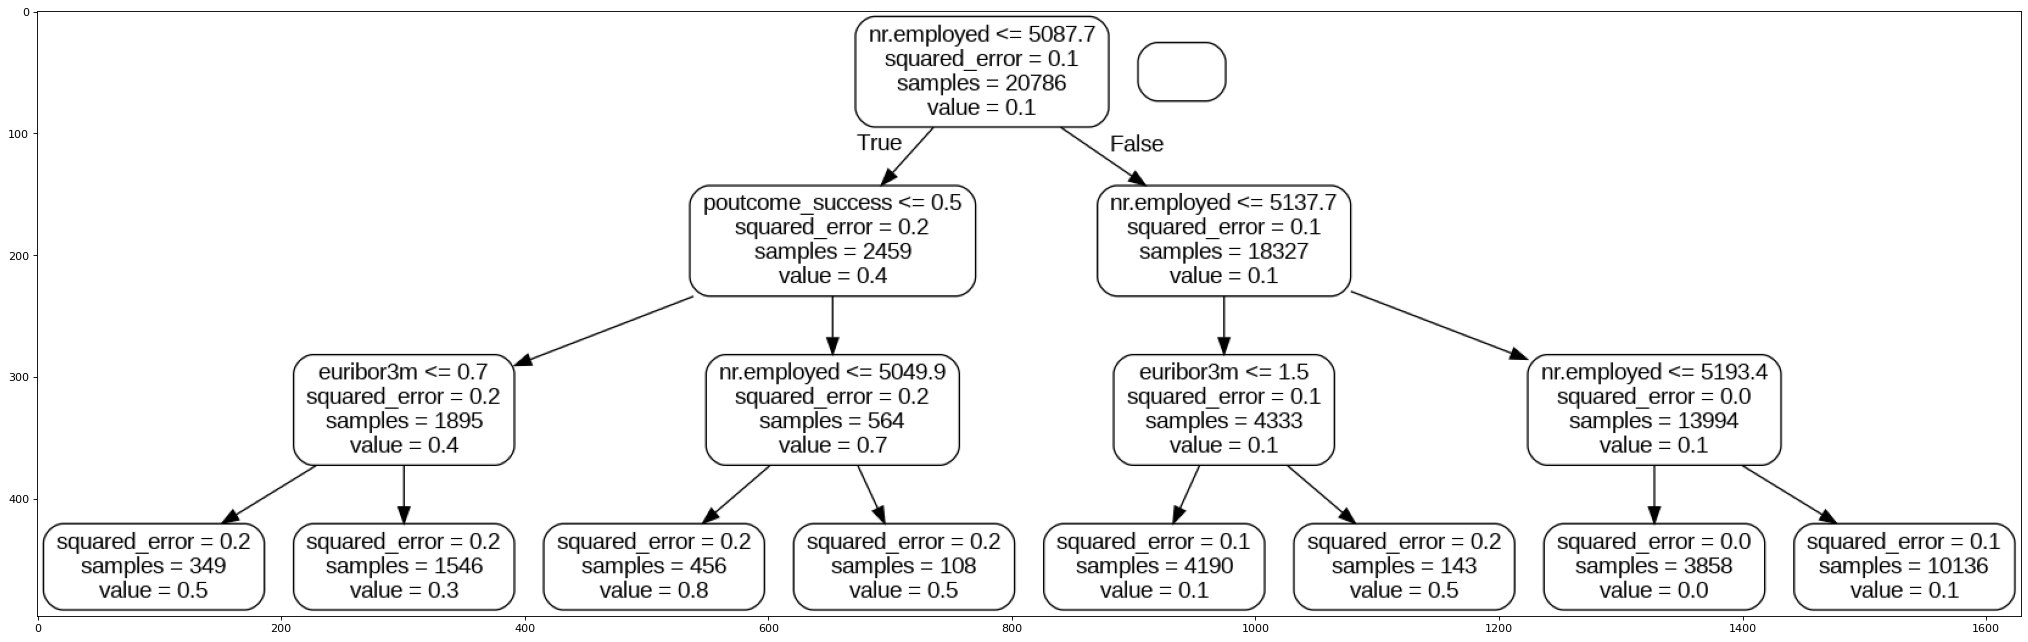

In [24]:
# Visualization of Nodes for the purpose of explainability
figure(figsize=(32, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(x_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

In [25]:
from graphviz import Source
from sklearn.tree import export_graphviz

tree = tree_model.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=list(x_train.columns), 
                           filled=True, rounded=True, special_characters=True)
graph = Source(dot_data)
graph.format = 'png'
graph.render('tree',view=True)


'tree.png'

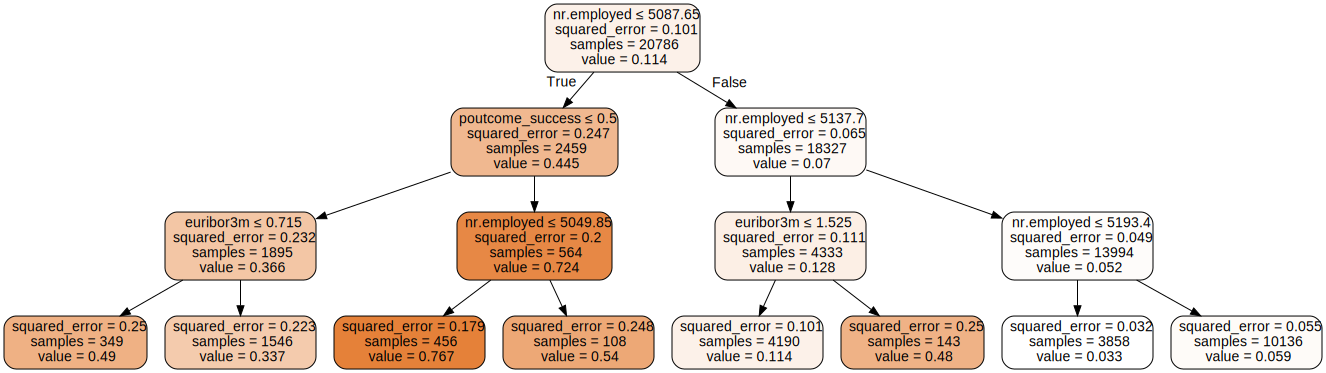

In [26]:
display(graph)

##**Interpreting the nodes of a tree based model**
**Explanation:**

This is a visual representation of a decision tree, where each internal node represents a condition on a feature, and the branching represents the outcome of that condition. The first condition is on the feature "nr.employed" with a threshold of 5087.65. If the value of "nr.employed" is less than or equal to 5087.65, the prediction value will be 0.114 with a squared error of 0.101, and there are 20786 samples falling into this region.

If the value of "nr.employed" is greater than 5087.65, the tree checks the next condition, which is on the feature "poutcome_success" with a threshold of 0.5. If the value of "poutcome_success" is less than or equal to 0.5, the prediction value will be 0.445 with a squared error of 0.247, and there are 2459 samples falling into this region.

If the value of "poutcome_success" is greater than 0.5, the tree checks the next condition, which is on the feature "nr.employed" with a threshold of 5137.7. If the value of "nr.employed" is less than or equal to 5137.7, the prediction value will be 0.07 with a squared error of 0.065, and there are 18327 samples falling into this region.

If the value of "nr.employed" is greater than 5137.7, the tree checks the next condition, which is on the feature "euribor3m" with a threshold of 0.715. If the value of "euribor3m" is less than or equal to 0.715, the prediction value will be 0.366 with a squared error of 0.232, and there are 1895 samples falling into this region.

If the value of "euribor3m" is greater than 0.715, the tree checks the next condition, which is on the feature "nr.employed" with a threshold of 5049.85. If the value of "nr.employed" is less than or equal to 5049.85, the prediction value will be 0.724 with a squared error of 0.2, and there are 564 samples falling into this region. Otherwise, the tree checks the next condition, which is on the feature "euribor3m" with a threshold of 1.525. If the value of "euribor3m" is less than or equal to 1.525, the prediction value will be 0.128 with a squared error of 0.111, and there are 4333 samples falling into this region. Otherwise, the prediction value will be 0.033 with a squared error of 0.032, and there are 3858 samples falling into this region.

In [27]:
# Get numerical feature importances
tree_importances = list(tree_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(x_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [28]:

# Print out the feature and importances
[print("Variable: {:10} Importance: {}".format(*pair)) for pair in feature_importances];
     

Variable: nr.employed Importance: 0.76
Variable: poutcome_success Importance: 0.14
Variable: euribor3m  Importance: 0.09
Variable: emp.var.rate Importance: 0.02


## **Getting best model using H2O AutoML**

In [29]:
h2o_data = h2o.import_file('https://raw.githubusercontent.com/Pramita0410/AutoML_bank/main/bank-additional-full.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [30]:
# Create a 80/20 train/test split
pct_rows=0.80
data_train, data_test = h2o_data.split_frame([pct_rows])

     


In [31]:

#Display all columns in X
X=h2o_data.columns
print(X)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [32]:
#Seperate Dependent variable from Independent variable
y_numeric ='y'
X.remove(y_numeric) 
print(X)

     

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [33]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML


In [34]:
aml.train(x=X, y=y_numeric, training_frame=data_train)  # Trainig the dataset on different models


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_2_AutoML_1_20230327_201257


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       8/12
# GBM base models (used / total)           3/5
# XGBoost base models (used / total)       3/3
# DRF base models (used / total)           1/2
# GLM base models (used / total)           0/1
# DeepLearning base models (used / total)  1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03779247936534296
RMSE: 0.19440287900476927
LogLoss: 0.12495351054698253
AUC: 0.9778520322759098
AUCPR: 0.8574639227049965
Gini: 0.9557040645518196
Null degrees of freedom: 10090
Residual degrees of freedom: 10082
Null deviance: 6895.098434378715
Residual deviance: 2521.811749859201
AIC: 2539.811749859201

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4374331825080587
       no    yes    Error    Rate
-----  ----  -----  -------  ---------------
no     8731  274    0.0304   (274.0/9005.0)
yes    236   850    0.2173   (236.0/1086.0)
Total  8967  1124   0.0505   (510.0/10091.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.437433     0.769231  169
max f2                       0.197486     0.8264    264
max f0point5                 0.577437     0.803616  120
max accuracy                 0.483855     0.950451  153
max precision                0.988008     1         0
max recall                   0.0118247    1         373
max specificity              0.988008     1         0
max absolute_mcc             0.437433     0.741001  169
max min_per_class_accuracy   0.239451     0.918379  245
max mean_per_class_accuracy  0.176332     0.928669  273
max tns                      0.988008     9005      0
max fns                      0.988008     1085      0
max fps                      0.000818426  9005      399
max tps                      0.0118247    1086      373
max tnr                      0.988008     1         0
max fnr                      0.988008     0.999079  0
max fpr                      0.000818426  1         399
max tpr                      0.0118247    1         373

Gains/Lift Table: Avg response rate: 10.76 %, avg score: 11.20 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100089                   0.869141           9.2919      9.2919             1                0.916001    1                           0.916001            0.0930018       0.0930018                  829.19    829.19             0.0930018
2        0.0200178                   0.807428           9.1999      9.2459             0.990099         0.838041    0.99505                     0.877021            0.092081        0.185083                   819.99    824.59             0.184972
3        0.0300268                   0.760606           8.9239      9.13857            0.960396         0.785006    0.983498                    0.846349            0.0893186       0.274401                   792.39    813.857            0.27


### lets create the leader Board for all out models, ranking them by their performance(default: mean_per_class_error	)
### We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well. 
### Here from the leaderboard we have "GBM_5_AutoML_1_20221107_231030	" as the leader(best performing) model



In [35]:

leaderboard = print(
    aml.leaderboard
) 


model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_2_AutoML_1_20230327_201257     0.948711   0.174173  0.660651                0.14812   0.23627   0.0558237
StackedEnsemble_AllModels_1_AutoML_1_20230327_201257     0.948549   0.174461  0.658003                0.154401  0.236556  0.055959
StackedEnsemble_BestOfFamily_2_AutoML_1_20230327_201257  0.94828    0.174566  0.658688                0.154134  0.236643  0.0559998
StackedEnsemble_BestOfFamily_1_AutoML_1_20230327_201257  0.948268   0.174985  0.657139                0.138715  0.236744  0.0560476
StackedEnsemble_BestOfFamily_3_AutoML_1_20230327_201257  0.948174   0.174709  0.657804                0.154105  0.236784  0.0560665
GBM_1_AutoML_1_20230327_201257                           0.94779    0.175573  0.656326                0.140175  0.237091  0.056212
GBM_2_AutoML_1_20230327_201257                           0.946734   0.179046  

In [36]:

best_model = aml.leader
best_model.model_performance(data_test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.054984006382675976
RMSE: 0.23448668700520287
LogLoss: 0.17242157010844242
AUC: 0.9494364830324435
AUCPR: 0.6754256582728042
Gini: 0.8988729660648871
Null degrees of freedom: 8164
Residual degrees of freedom: 8156
Null deviance: 5732.866448436549
Residual deviance: 2815.6442398708646
AIC: 2833.6442398708646

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3255215796925768
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     6713  536    0.0739   (536.0/7249.0)
yes    200   716    0.2183   (200.0/916.0)
Total  6913  1252   0.0901   (736.0/8165.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.325522     0.660517  212
max f2                       0.165296     0.765448  279
max f0point5                 0.495576     0.642051  148
max accuracy                 0.495576     0.919412  148
max precision                0.969624     1         0
max recall                   0.00297448   1         391
max specificity              0.969624     1         0
max absolute_mcc             0.282136     0.621836  230
max min_per_class_accuracy   0.188565     0.883846  269
max mean_per_class_accuracy  0.0946403    0.889409  315
max tns                      0.969624     7249      0
max fns                      0.969624     915       0
max fps                      0.000785295  7249      399
max tps                      0.00297448   916       391
max tnr                      0.969624     1         0
max fnr                      0.969624     0.998908  0
max fpr                      0.000785295  1         399
max tpr                      0.00297448   1         391

Gains/Lift Table: Avg response rate: 11.22 %, avg score: 11.63 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100429                   0.850082           7.82671    7.82671            0.878049         0.892626    0.878049                    0.892626            0.0786026       0.0786026                  682.671   682.671            0.0772231
2        0.0200857                   0.798582           7.17449    7.5006             0.804878         0.825066    0.841463                    0.858846            0.0720524       0.150655                   617.449   650.06             0.147068
3        0.0300061                   0.756317           6.49274    7.16739            0.728395         0.776148    0.804082                    0.831505            0.0644105       0.215066                   549.274   616.739            0.208444
4        0.040049                    0.709783           5.76133    6.8148             0.646341         0.731757    0.764526                    0.806492            0.0578603       0.272926                   476.133   581.48             0.262304
5        0.0500919                   0.666692           6.41356    6.73435            0.719512         0.68745     0.755501                    0.782625            0.0644105       0.337336                   541.356   573.435            0.323541
6        0.100061                    0.500442           4.95937    5.84795            0.556373         0.580234    0.656059                    0.681553            0.247817        0.585153                   395.937   484.795            0.546389
7        0.150031                    0.334615           3.64852    5.1154             0.409314         0.420404    0

In [37]:
# Getting the name of the best model
best_model_name = best_model.model_id

# Print the name of the best model
print("The best model is:", best_model_name)

The best model is: StackedEnsemble_AllModels_2_AutoML_1_20230327_201257


**Explanation**: The top three models on the leaderboard differ in their approach to making predictions. The first two models are ensemble models, which combine multiple models, while the third model is a GBM which is a Gradient Boosting Method.

Ensembles, particularly stacked ensembles, tend to perform better than single models as they use a combination of models to make predictions.

## **SHAP, Partial Dependence Plot, Individual Conditional Expectation Analysis for AutoML Best Model**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_2_AutoML_1_20230327_201257     0.949436   0.172422  0.675426                0.146141  0.234487  0.054984                 3250                   0.049358  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230327_201257     0.949262   0.172617  0.674524                0.147641  0.234734  0.0551001                2824                   0.046725  StackedEnsemble
GBM_2_AutoML_1_20230327_201257                           0.948931   0.175223  0.660917                0.153702  0.236623  0.0559903                2932                   0.017616  GBM
StackedEnsemble_BestOfFamily_3_AutoML_1_20230327_201257  0.948718   0.173309  0.673579                0.139207  0.235002  0.0552259                2572                   0.030871  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230327_201257  0.948659   0.17328   0.673361                0.140229  0.23499   0.0552202                3264                   0.06113   StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20230327_201257  0.948501   0.17342   0.672265                0.150301  0.235355  0.0553918                2819                   0.026838  StackedEnsemble
XGBoost_2_AutoML_1_20230327_201257                       0.947888   0.177235  0.651701                0.149791  0.238597  0.0569283                2780                   0.006822  XGBoost
GBM_1_AutoML_1_20230327_201257                           0.947417   0.174621  0.66867                 0.139018  0.23605   0.0557195                5143                   0.016306  GBM
XGBoost_3_AutoML_1_20230327_201257                       0.947034   0.186403  0.663468                0.146435  0.237681  0.0564922                 701                   0.006394  XGBoost
XGBoost_1_AutoML_1_20230327_201257                       0.946781   0.178585  0.654602                0.125955  0.239653  0.0574337                6250                   0.004694  XGBoost
GBM_3_AutoML_1_20230327_201257                           0.946532   0.179616  0.650205                0.150658  0.240013  0.0576062                2173                   0.010909  GBM
GBM_4_AutoML_1_20230327_201257                           0.945838   0.182594  0.645249                0.133957  0.241253  0.058203                 2265                   0.010879  GBM
GBM_5_AutoML_1_20230327_201257                           0.944068   0.187015  0.655775                0.144038  0.238773  0.0570127                 759                   0.004767  GBM
DRF_1_AutoML_1_20230327_201257                           0.935315   0.211234  0.638725                0.171841  0.241988  0.0585583                2399                   0.009357  DRF
GLM_1_AutoML_1_20230327_201257                           0.93443    0.210856  0.587973                0.173124  0.251993  0.0635004                1637                   0.005678  GLM
DeepLearning_1_AutoML_1_20230327_201257                  0.927388   0.204806  0.585782                0.167434  0.254092  0.0645625                 393                   0.005136  DeepLearning
XRT_1_AutoML_1_20230327_201257                           0.925096   0.290377  0.608315                0.1808    0.250024  0.062512                  636                   0.009554  DRF
XGBoost_grid_1_AutoML_1_20230327_201257_model_1          0.798607   0.51737   0.441797                0.256705  0.404907  0.16395                   172                   0.000813  XGBoost
[18 rows x 10 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_2_AutoML_1_20230327_201257

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3255215796925768
       no    yes    Error    Rate
-----  ----  -----  -------  --------------
no     6713  536    0.0739   (536.0/7249.0)
yes    200   716    0.2183   (200.0/916.0)
Total  6913  1252   0.0901   (736.0/8165.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

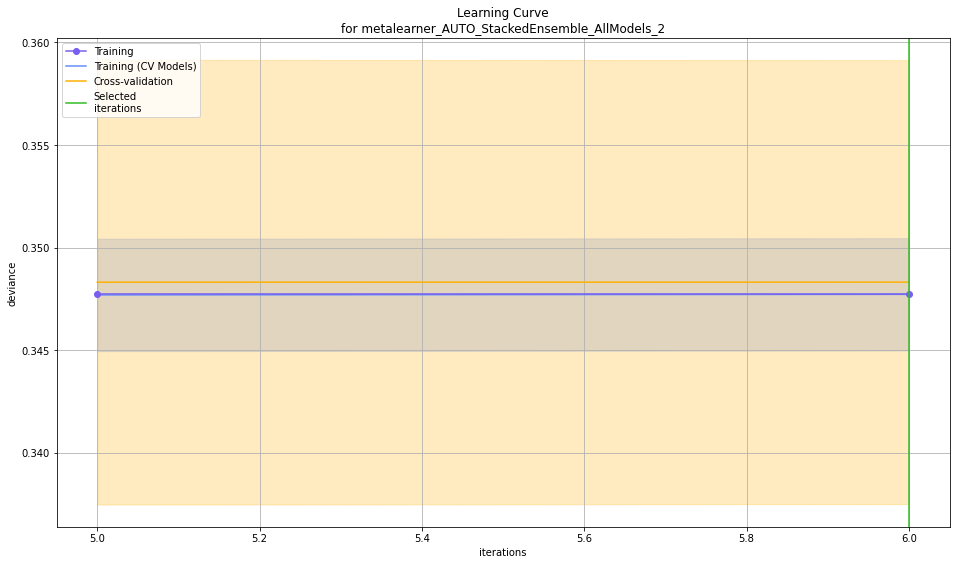

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

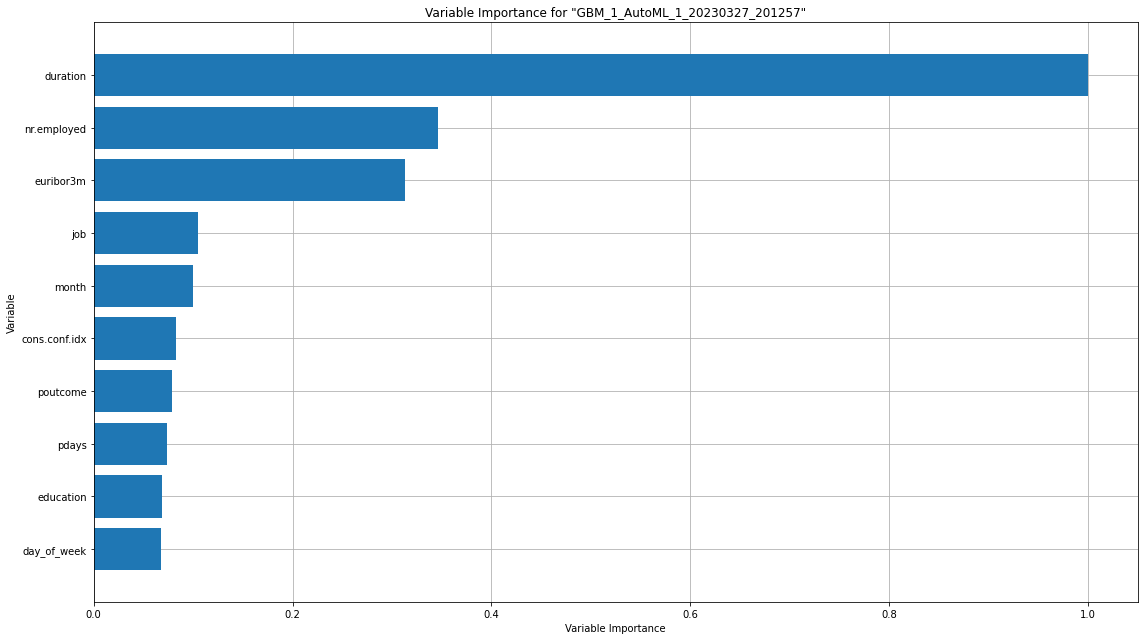

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

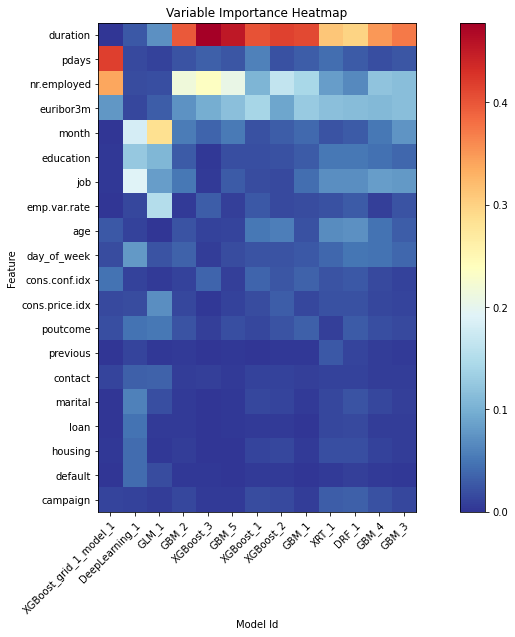

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

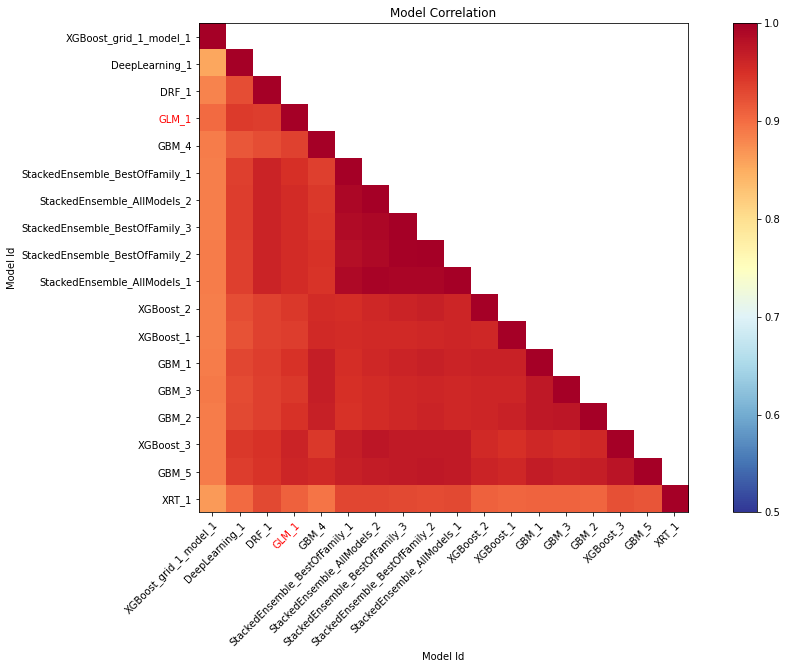

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

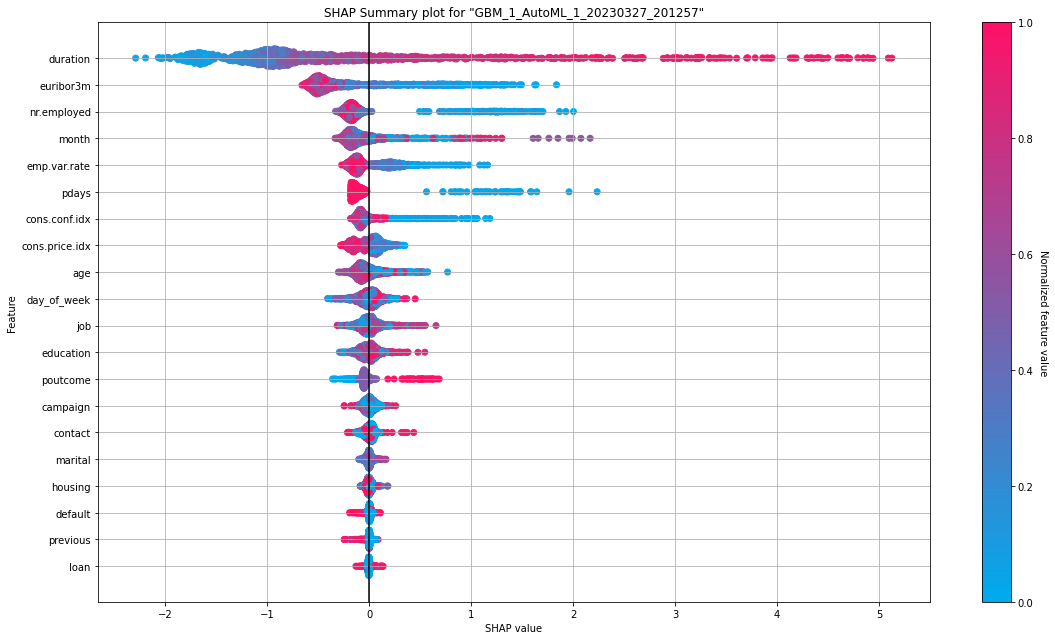

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

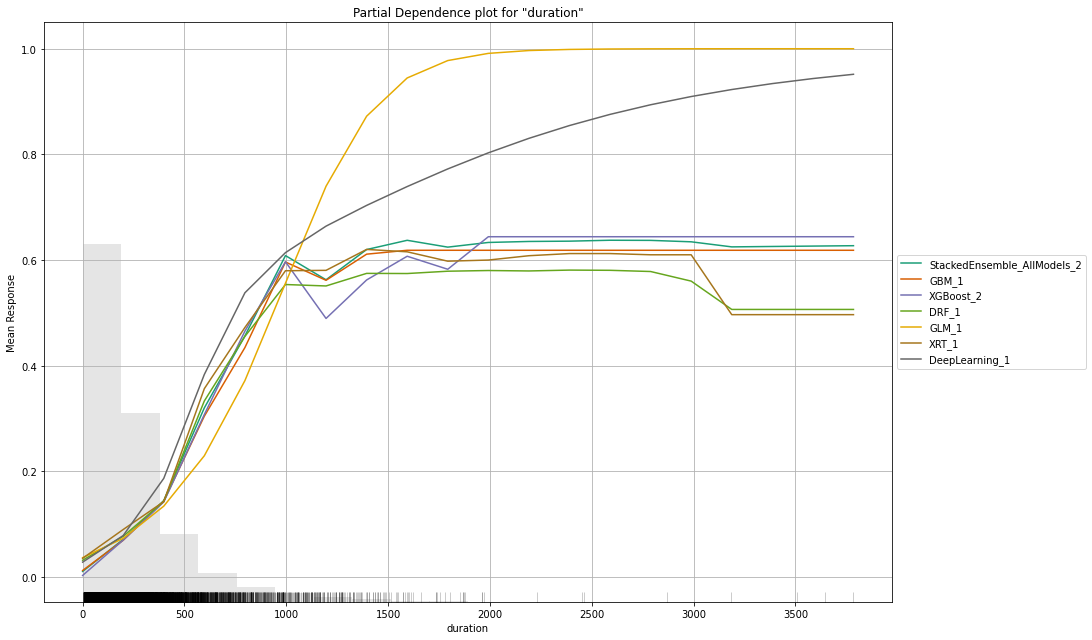

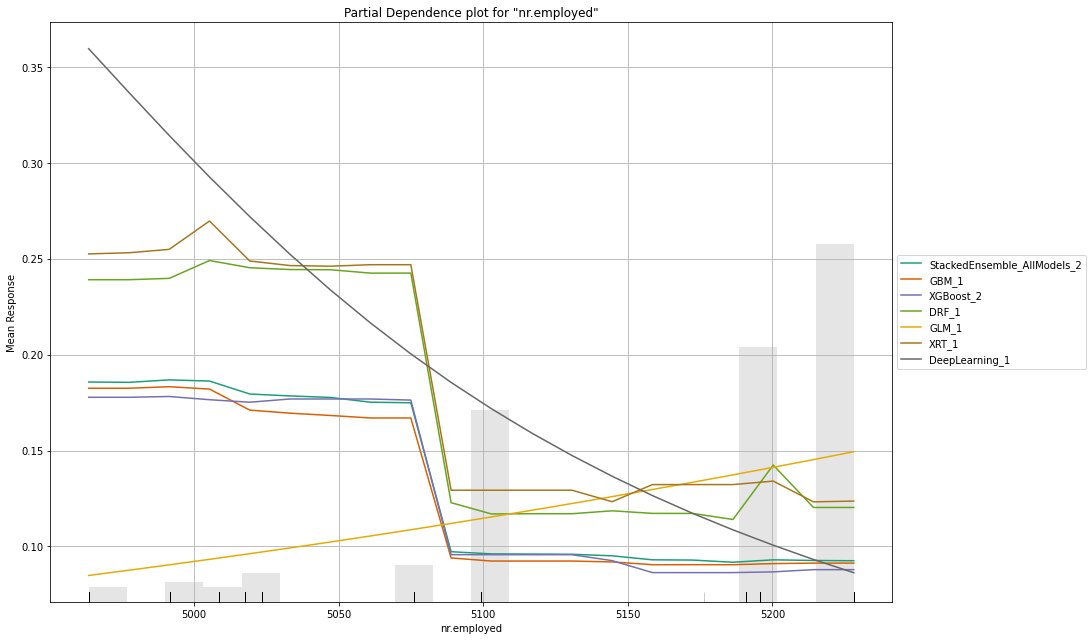

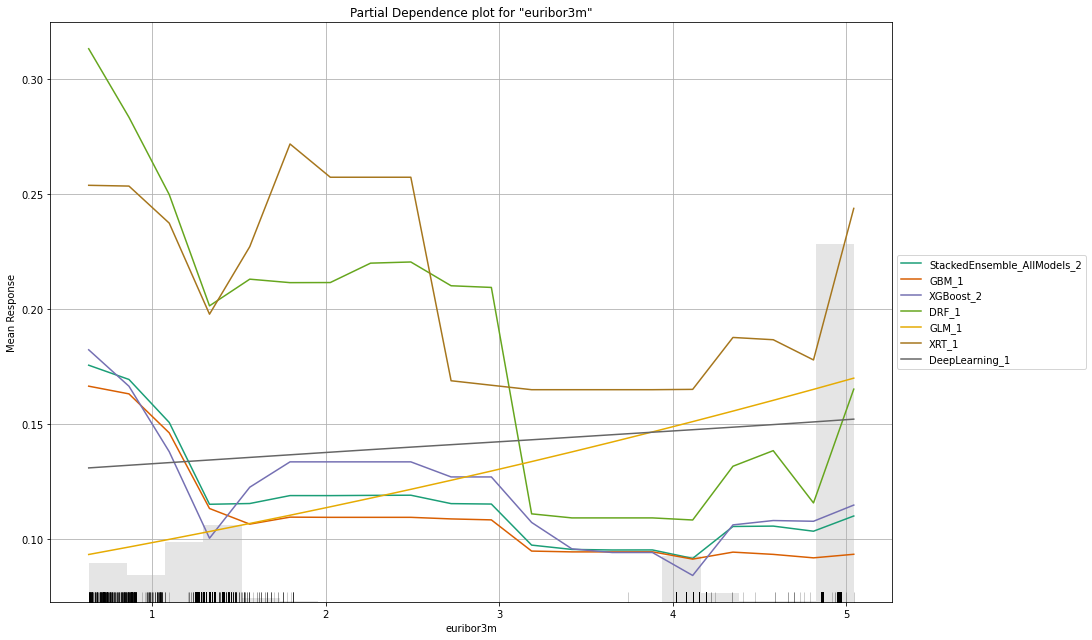

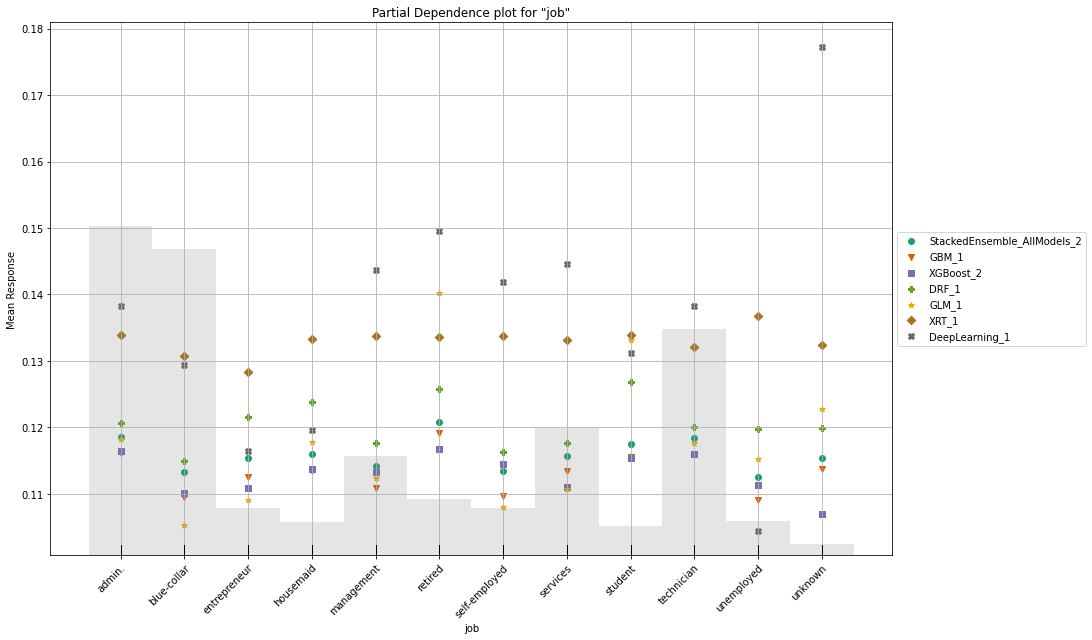

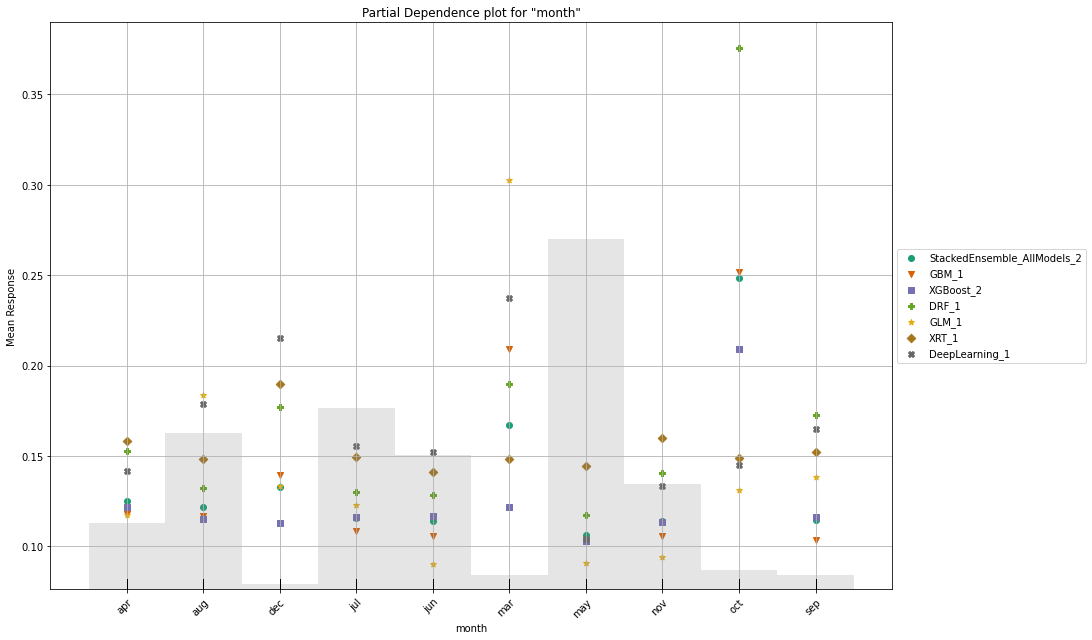

In [38]:
explain = aml.explain(data_test)




# **SHAP Analysis for Linear**

Exact explainer: 32951it [01:37, 310.44it/s]                           


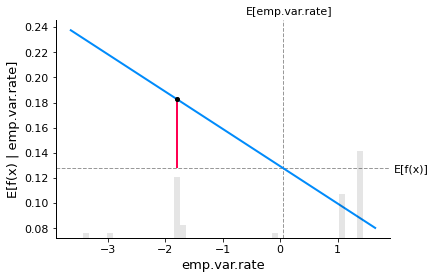

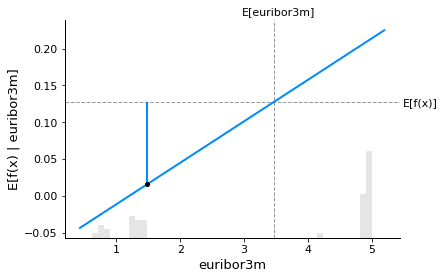

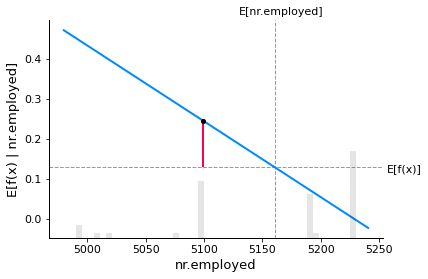

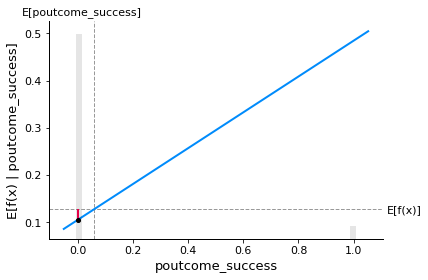

In [39]:
import random
import shap
import matplotlib.pyplot as plt



# set seed for reproducibility
np.random.seed(123)

# generate samples
x_train_50 = shap.utils.sample(x_train, 50, random_state=123)
x_test_50 = shap.utils.sample(x_test, 50, random_state=123)


# SHAP explanation of a Linear Model
linear_explainer = shap.Explainer(linear_model.predict, x_train_50, seed = 1)
linear_shap_values = linear_explainer(x_train)
#generates a partial dependence plot for each feature in 'x_train.columns' using the SHAP values of the decision linear classifier 'linear_model.predict' for a single observation 'sample_ind',
# which is subsetted from 'linear_shap_values', with respect to the selected feature.

# looping over the columns of the training set 

for i in x_train.columns:
    # set the index of the sample to use for generating the plot
    sample_ind = 4
    
    # generate the partial dependence plot for the selected sample
    shap.partial_dependence_plot(
        i,
        linear_model.predict,
        x_train_50,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind:sample_ind+1, :],
    )

#**SHAP Analysis for Treee-Based**


In [40]:

# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(tree_model.predict, x_train_50, seed= 1)
tree_shap_values = tree_explainer(x_train)

Exact explainer: 32951it [02:56, 174.73it/s]                           


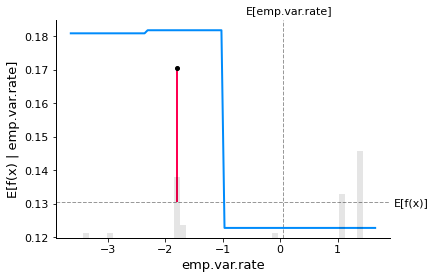

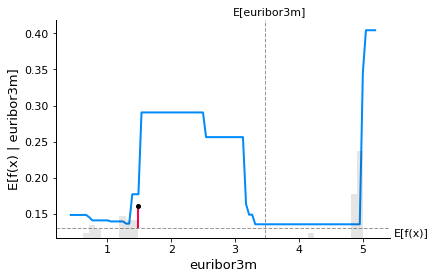

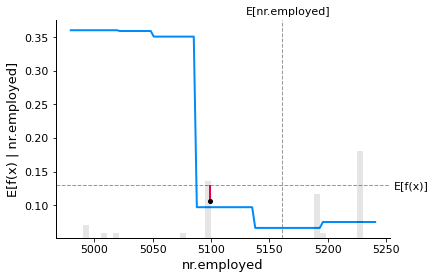

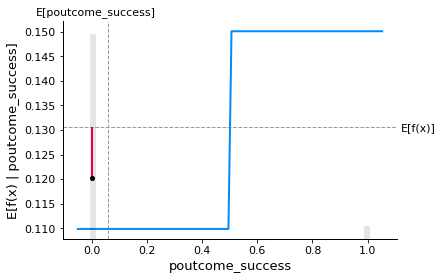

In [41]:
#generates a partial dependence plot for each feature in 'x_train.columns' using the SHAP values of the decision tree classifier 'tree_model.predict' for a single observation 'sample_ind',
# which is subsetted from 'tree_shap_values', with respect to the selected feature.
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 4
    shap.partial_dependence_plot(
        i,
        tree_model.predict,
        x_train_50,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )


Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.

Let us take a feature of emp.var.rate

For the linear model the cross is made at approx E[f(x)] 0.18
For Tree-based model the cross is made at approx E[f(x)] 0.17


Talking about the red line on the plot - When we give a sample as an input (sample_ind = 4) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.

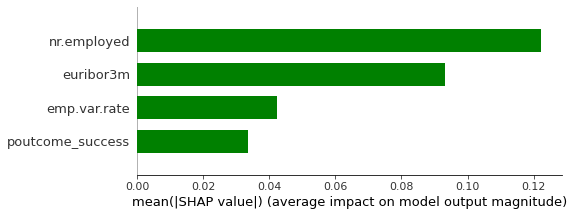

In [42]:
shap.summary_plot(linear_shap_values, x_train, plot_type="bar", color="green")



Here, the features are listed along the y-axis and the corresponding feature importance values are shown on the x-axis.

It means,for Linear models value, nr.employed has he most feature importance which is around 0.13 and the poutcome_success has the least with 0.3

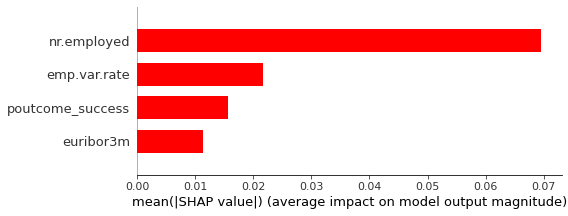

In [43]:
shap.summary_plot(tree_shap_values, x_train, plot_type="bar", color="red")



Here, the features are listed along the y-axis and the corresponding feature importance values are shown on the x-axis.

It means,for Tree models value, nr.employed has he most feature importance which is around 0.07 and the poutcome_success has the least with aprroximately 0.01

# **Interpreting Waterfall SHAP visualization**


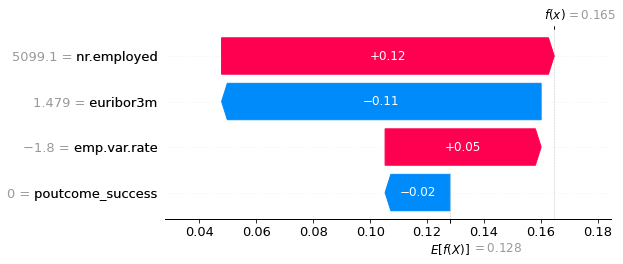

In [44]:

# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)
     

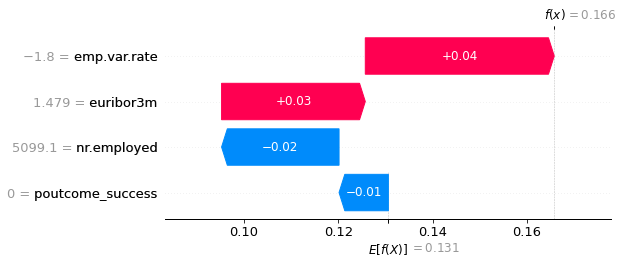

In [45]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

**Comparison and Explanation** 

In the linear model waterfall plot, there is a red bar for the feature 'nr.employed', which has a positive value of +0.12 and ranges from 0.05 to 0.165 on the x-axis. This indicates that this feature had a positive impact on the model output, and its contribution was significant. Similarly, there is a blue bar for the feature 'euribor3n', which has a positive value of around +0.14 and ranges from 0.05 to 0.16 on the x-axis.

In contrast, in the tree-based model waterfall plot, the same feature 'nr.employed' has a negative value of -0.02, and the bar is blue, indicating that it had a negative impact on the model output. The x-axis ranges from 0.10 to 0.12, and the y-axis value is the same as the linear model, which is 5099.1. Similarly, the feature 'euribor3n' has a positive value of around +0.03, and the bar is blue. The x-axis ranges from 0.10 to 0.13, and the y-axis value is again the same as the linear model.

Overall, we can see that the impact and contribution of the features are different in the two models. In the linear model, 'nr.employed' and 'euribor3n' had a significant positive impact, while in the tree-based model, 'nr.employed' had a negative impact. This indicates that the models are using different features and their impact on the model output is also different. By analyzing the waterfall plots, we can gain insights into how the models are making predictions and which features are important for them.

# **Interpret the summary plot for the Linear and Tree-based model**

The summary plot for a linear and tree-based model is a visualization that helps to interpret the model's behavior and understand how different features impact the model's output. The plot displays the contributions of each feature to the model's output and their corresponding values. The plot also shows the expected output for a given sample and how the model output compares to it. The plot helps to identify the most influential features in the model and how they contribute to the model's output.

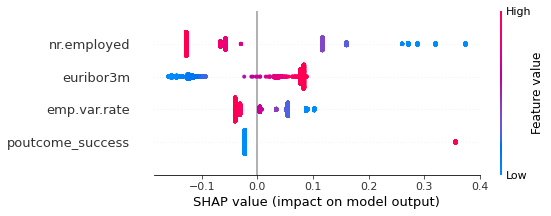

In [46]:
shap.summary_plot(linear_shap_values, x_train, plot_type="dot", color="blue")


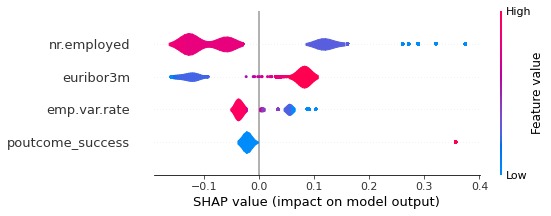

In [47]:
shap.summary_plot(linear_shap_values, x_train, plot_type="violin", color="voilet")


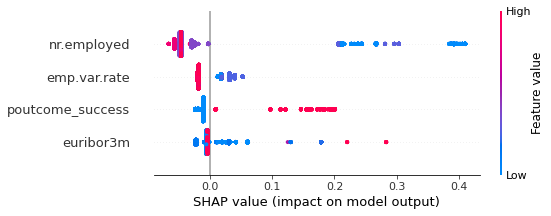

In [48]:

# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, x_train)
     

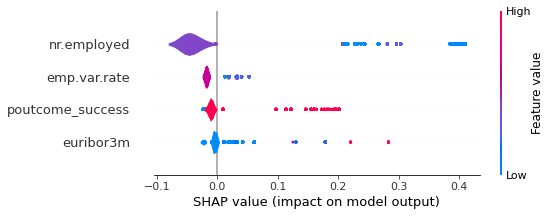

In [49]:
shap.summary_plot(tree_shap_values, x_train, plot_type="violin")

Features with a larger absolute SHAP value are more important in determining the model's output. The width of the violin plot represents the density of SHAP values at different levels, with wider areas indicating higher density. 

# **Interpreting SHAP dependence plot for Linear and Tree-based model**

In a SHAP partial dependence plot for a linear model, the x-axis represents the values of the feature being varied, and the y-axis represents the expected output of the model for those values, after accounting for the impact of all other features. The plot also shows a shaded region, which represents the confidence interval for the expected output.

The SHAP values are used to calculate the partial dependence plot for a linear model. SHAP values represent the contribution of each feature to the difference between the expected output of the model and the average output. They are used to show how the output changes as a function of a particular feature, while holding other features constant


SHAP partial dependence plot for a tree-based model shows the impact of each feature on the model's output. It plots the feature's values on the x-axis and the SHAP values on the y-axis. Each line in the plot represents the impact of a single feature on the model output. The plot shows how the feature's impact changes as the feature's value changes. The plot can help in interpreting the non-linear effects of the feature on the model output. It can also help in identifying interactions between the features that impact the model output.

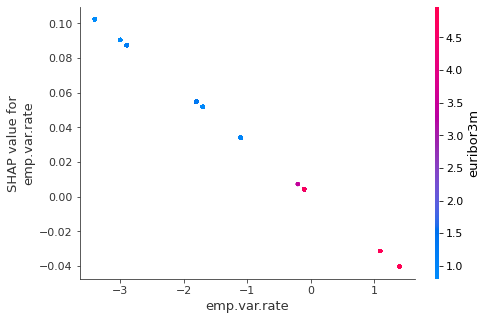

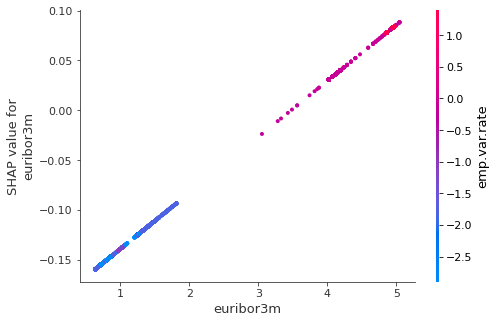

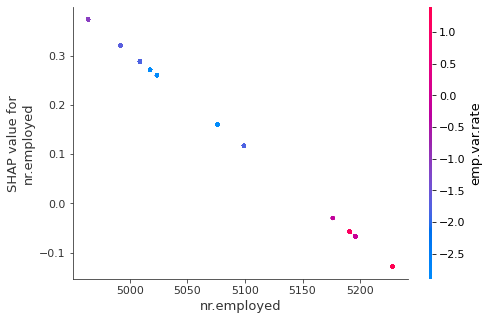

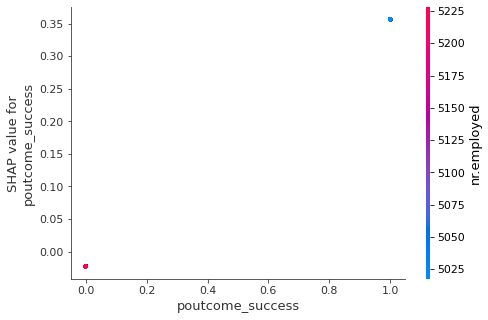

In [50]:

# SHAP partial dependence plot for linear model
for i in x_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, x_train)

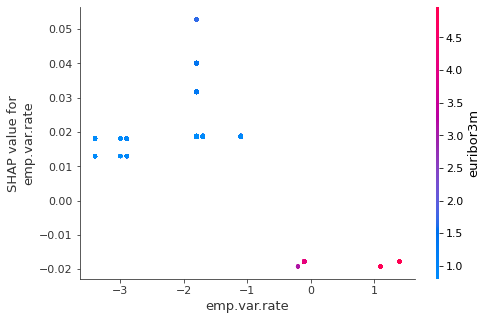

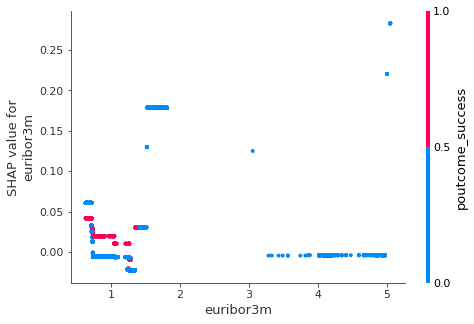

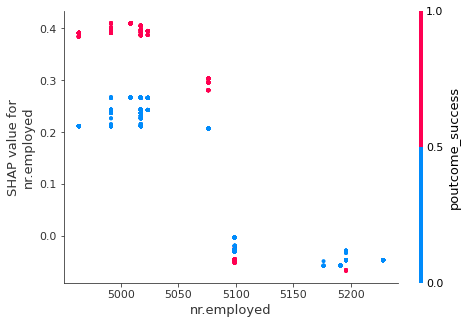

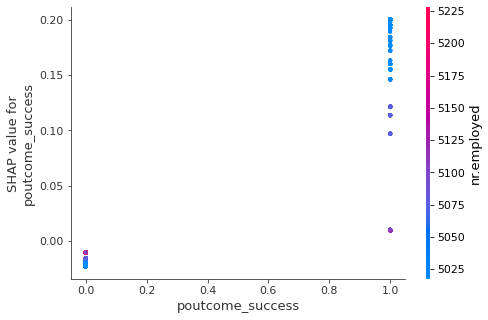

In [51]:
# SHAP partial dependence plot for a tree based model
#creates dependence plots to visualize the relationship between each feature and its corresponding Tree SHAP values for a dataset of 2000 samples.
for i in x_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, x_train)
     

In [52]:
X_output_linear = x_test.copy()
X_output_linear.loc[:, "predict"] = np.round(
    linear_model.predict(X_output_linear), 2
)  # Attaching the output of linear model to test dataframe

X_output_tree = x_test.copy()
X_output_tree.loc[:, "predict"] = np.round(
    tree_model.predict(X_output_tree), 2
)  # Attaching the output of tree based model to test dataframe

In [53]:

# Force Plot of Tree Based Model
explainerModel = shap.TreeExplainer(tree_model)
shap_values_Model = explainerModel.shap_values(X_output_tree)


In [54]:
expected_value = shap_values_Model[0,-1]
shap_values = shap_values_Model[:,:-1]

In [55]:
shap.initjs()  # Initializing JavaScript module
shap.force_plot(expected_value, shap_values[0,:], x_test.iloc[0,:])

Here, the width of line in this SHAP plot represents the magnitude of the feature's effect, and the color of the line indicates the direction of the effect (e.g., red for positive and blue for negative).

**emp.var.rate**= -1.8: This means that when the value of the feature emp.var.rate is lower than its baseline value (which was used to compute the SHAP values), it has a negative effect on the predicted outcome. Specifically, a decrease of 1.8 units in emp.var.rate leads to a decrease in the predicted outcome. Conversely, an increase of 1.8 units in emp.var.rate would lead to an increase in the predicted outcome.

**euribor3n** = 1.41: This means that when the value of the feature euribor3n is higher than its baseline value, it has a negative effect on the predicted outcome. Specifically, an increase of 1.41 units in euribor3n leads to a decrease in the predicted outcome. Conversely, a decrease of 1.41 units in euribor3n would lead to an increase in the predicted outcome.

**nr.employed** = 5,099: This means that when the value of the feature nr.employed is higher than its baseline value, it has a positive effect on the predicted outcome. Specifically, an increase of 5,099 units in nr.employed leads to an increase in the predicted outcome. Conversely, a decrease of 5,099 units in nr.employed would lead to a decrease in the predicted outcome.

**poutcome_success** = 0: This means that when the value of the feature poutcome_success is zero (i.e., the outcome was not successful), it has a negative effect on the predicted outcome. Specifically, if the outcome was not successful, the predicted outcome is lower than if the outcome was successful. It is important to note that poutcome_success is a binary feature that takes on the value of 1 if the outcome was successful and 0 otherwise. Therefore, the SHAP value for this feature represents the effect of the outcome on the predicted outcome.






## **Heatmap Visualization for Linear and Tree-based model**


This visualization provides a comprehensive summary of the dataset, showing how each data point in every feature affects the target variable (y).

 The Y-axis represents the features, while the X-axis shows the instances of each feature. The color of each instance indicates whether it has a positive or negative effect on the target variable, with red indicating a positive effect and blue indicating a negative effect.
 
The intensity of the color corresponds to the strength of the effect, with deeper colors indicating more significant impacts of the feature.

 **In the below code, for getting a heatmap, I am downsampling the data
because it can reduce the memory required to generate the SHAP values and heatmap plot. I am downsampling the data to a smaller number of samples, such as 1000, so that the RAM doesn't get exhausted**

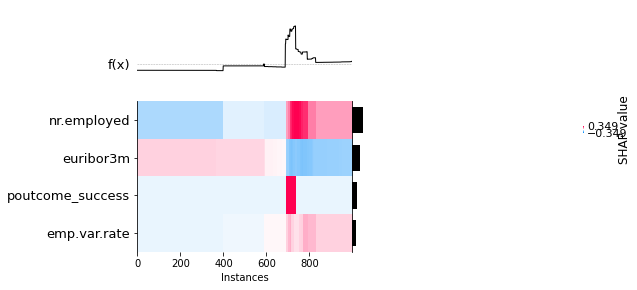

In [56]:

# Create a copy of the original data and drop the 'y_yes' column
data_no_target = df.drop('y_yes', axis=1)

# Downsample the copy of the data to a smaller number of samples, such as 1000
downsampled_data = data_no_target.sample(n=1000, random_state=42)

# Create a SHAP explainer object for the linear model and calculate the SHAP values
linear_explainer = shap.Explainer(linear_model.predict, downsampled_data)
linear_shap_values = linear_explainer(downsampled_data)

# Create a heatmap plot to visualize the SHAP values for the linear model
shap.plots.heatmap(linear_shap_values)

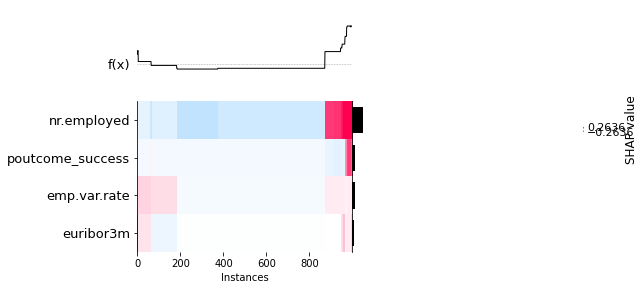

In [57]:


# Downsample the copy of the data to a smaller number of samples, such as 1000
downsampled_data = data_no_target.sample(n=1000, random_state=42)

# Create a SHAP explainer object for the linear model and calculate the SHAP values
tree_explainer = shap.Explainer(tree_model.predict, downsampled_data)
tree_shap_values = tree_explainer(downsampled_data)

# Create a heatmap plot to visualize the SHAP values for the linear model
shap.plots.heatmap(tree_shap_values)

## **Lime Analysis For Linear model**

In [58]:
from sklearn.metrics import mean_squared_error


import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Initialize LIME explainer for linear model
lime_linear_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), feature_names=x_train.columns, mode="regression"
)


# Use LIME to generate interpretation for a single instance of test data
idx = 18
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)
print("Prediction : ", linear_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_linear_explain = lime_linear_explainer.explain_instance(
    np_x_test[idx], linear_model.predict, num_features=np_x_test.shape[1]
)




Prediction :  [0.16106292]
Actual :      0


**Explanation**: The output Prediction : [0.16106292] indicates that the linear regression model predicted the target variable to be 0.16106292 for the given instance of test data.

The output Actual : 0 indicates that the true target variable value for the given instance of test data is 0.

Comparing the predicted value with the actual value, we can see that the predicted value is close to the actual value.

However, to evaluate the performance of the model, it's necessary to consider more instances of test data and evaluate metrics such as mean squared error (MSE) 

In [59]:

    # Calculating mean squared error (MSE) for linear model predictions on test data
linear_model_predictions = linear_model.predict(x_test)
linear_model_mse = mean_squared_error(y_test, linear_model_predictions)
print("Linear Model Mean Squared Error: ", linear_model_mse)

Linear Model Mean Squared Error:  0.08229596909405776


**Explanation**:  In this case, the MSE value of 0.08229596909405776 suggests that, on average, the model's predictions are off by approximately 0.29 (square root of MSE) on the test data.

A lower MSE value indicates better performance of the model. 

In [64]:
lime_linear_explain.show_in_notebook()  # Displaying The Results


In the above diagram, The predicted value for the instance is between -0.22 and 0.94, with a higher likelihood of a positive outcome (0.15-0.93) than a negative outcome (-0.20 to 0.15).
It shows that the absence of a previous successful marketing campaign (**poutcome_success <= 0.38**) is still an important feature for this instance, with a weight of 0.32. This means that the absence of a previous successful marketing campaign reduces the likelihood of a positive outcome.

The second most important feature for this instance is the number of employees (**nr.employed <= 5191.00**), with a weight of 0.27. This indicates that having fewer employees may increase the likelihood of a positive outcome.

The third important feature is the 3-month Euribor rate (**euribor3m <= 0.01**), with a weight of 0.21. A lower 3-month Euribor rate can increase the likelihood of a positive outcome.

Finally, the employment variation rate (**emp.var.rate <= -1.80**) is still an important feature, with a weight of 0.14. A more negative employment variation rate can decrease the likelihood of a positive outcome.

In summary, the local explanation provided by LIME highlights the most important features and their respective weights that contribute to the model's prediction for a specific instance. However, it's important to note that these explanations are specific to this instance and may not generalize to other instances.





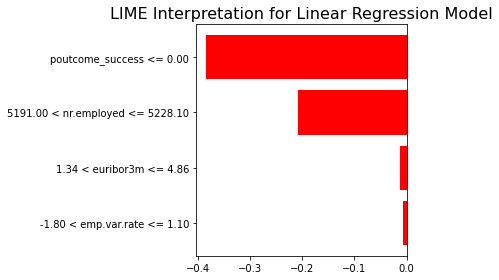

In [61]:

import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Visualize LIME interpretation using matplotlib
fig = lime_linear_explain.as_pyplot_figure()
ax = fig.gca()
ax.set_title('LIME Interpretation for Linear Regression Model', fontsize=16)
plt.tight_layout()
plt.show()

Here, specifically, the red color indicates that the feature has a negative impact on the prediction, while green indicates a positive impact.

Based on this information, it appears that poutcome_success has the largest negative impact on the model's prediction, followed by  nr.employed , and then euribor3n. emp.var.rate has a smaller positive impact. The values you mentioned (-0.4, -0.3, -0.2, and -0.1, 0.0) likely indicate the magnitude of the impact each feature has on the model's prediction.

# **Lime Analysis for Tree based model**

In [62]:
# Initialize LIME explainer for Tree-Based Model
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values,
                                                   feature_names=x_train.columns.values,
                                                   class_names=['prediction'],
                                                   verbose=True,
                                                   mode='regression')

# Define prediction function
def predict_function(X):
    return tree_model.predict(X)

# Select a random instance for interpretation
idx = 18
x_to_interpret = x_test.iloc[idx]

# Generate interpretation using LIME explainer
exp = explainer.explain_instance(x_to_interpret.values, predict_function, num_features=len(x_to_interpret), top_labels=1)

# Print interpretation
print('Actual:', y_test.iloc[idx])
print('Prediction:', tree_model.predict(x_to_interpret.values.reshape(1, -1))[0])
exp.show_in_notebook()


Intercept 0.27490516369263235
Prediction_local [0.1134371]
Right: 0.05224610877701623
Actual: 0
Prediction: 0.05224610877701623


**Intercept**: This is the base prediction for the model, i.e., the predicted value if all features are set to 0. In this case, the intercept is 0.2749.

**Prediction_local**: This is the prediction for the instance being interpreted, based on the model and the LIME interpretation. The value here is 0.1134.

**Right**: This is the difference between the predicted value for the instance being interpreted (Prediction_local) and the base prediction for the model (Intercept). In this case, it is -0.1615, which means that the model is predicting -0.1615 lower than the base prediction for this instance.

**Actual**: This is the actual value of the target variable for the instance being interpreted. In this case, it is 0.

**Prediction**: This is the predicted value of the target variable for the instance being interpreted based on the original model. In this case, it is 0.0522, which is the same as Right. This suggests that the model is giving too much weight to some features that are not very relevant for this particular instance.





**Graph explanation:** 
1. The first diagram shows the predicted value of the target variable for this instance, which is between 0.04 and 0.75 with a predicted value of 0.05. 
2. The second digram is the range that is divided into negative and positive, where negative values indicate that the predicted value is less than the mean of the target variable and positive values indicate that the predicted value is greater than the mean.

3. The last one shows the contribution of each feature towards the predicted value. For example, the feature 'nr.employed' has a value of 5195.80 for this instance, which has a contribution of 0.21 towards the predicted value. Similarly, the feature 'poutcome_success' has a value of 0.00, which has a contribution of 0.11 towards the predicted value. The feature 'emp.var.rate' has a value of -0.10, which has a contribution of 0.07 towards the predicted value. Finally, the feature 'euribor3m' has a value of 4.15, which has a contribution of 0.02 towards the predicted value.

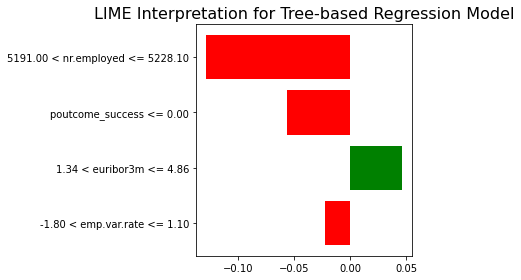

In [65]:
# Visualize LIME interpretation using matplotlib
fig = exp.as_pyplot_figure()
ax = fig.gca()
ax.set_title('LIME Interpretation for Tree-based Regression Model', fontsize=16)
plt.tight_layout()
plt.show()

Here, specifically, the red color indicates that the feature has a negative impact on the prediction, while green indicates a positive impact.

Based on this information, it appears that nr.employed has the largest negative impact on the model's prediction, followed by  poutcome_success  and then emp.var.rate.  euribor3n has a smaller positive impact. The values you mentioned (-0.1, -0.05, 0.00, and 0.05) likely indicate the magnitude of the impact each feature has on the model's prediction.

**Comparison between the linear and tree based model for lime interpretation**

1. In Linear model, poutcome_success has the largest negative impact on the model's prediction, followed by nr.employed , and then euribor3n. emp.var.rate has a smaller positive impact, whereaas, in tree based model, nr.employed has the largest negative impact on the model's prediction, followed by poutcome_success and then emp.var.rate. euribor3n has a smaller positive impact.

2. The values in Linear model are -0.4, -0.3, -0.2, and -0.1, 0.0, whereas, for tree based model are -0.1, -0.05, 0.00, and 0.05

# **REFERENCES**

* Shap official documentation: https://shap.readthedocs.io/en/latest/index.html

* Scikit-learn official documentation: https://scikit-learn.org/stable/modules/preprocessing.html
* Pandas official documentation: https://pandas.pydata.org/docs/user_guide/index.html
* "Data Preprocessing for Machine Learning with Python" by Selva Prabhakaran on KDnuggets: https://www.kdnuggets.com/2020/03/data-preprocessing-machine-learning-python.html
* "Data Preprocessing for Logistic Regression in Python" by Michael Galarnyk on Medium: https://towardsdatascience.com/data-preprocessing-for-logistic-regression-in-python-c632418098b0

# **CONCLUSION**

In conclusion, when interpreting machine learning models, the approach chosen should consider the specific requirements and trade-offs between accuracy and interpretability. LIME and SHAP are popular methods for interpreting black-box models, with LIME being lightweight and suitable for certain use cases, and SHAP being more stable and theoretically sound but requiring more computational resources. PDP and SHAP differ in their approach to analyzing variable contributions to the output, with PDP being useful for understanding the effect of a single variable on the output, while SHAP shows the contribution of each variable to the output. The best method to use ultimately depends on the specific goals and needs of the project at hand.

# **LICENSE**

Copyright 2023 Pramita Dileep Sandhyan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.